## ML1 Customer Satisfaction

### Submitted by: Mugdha Dongre
###               Date : 27.09.2021

## Table of Content

1. [Introduction](#section1)<br>
2. [Problem Statement](#section2)<br>
3. [Data Description](#section3)<br>
4. [Installing Libraries](#section4)<br>
    - 4.1 [Installing Libraries](#section401)<br>
    - 4.2 [Importing Libraries](#section402)<br>
5. [Data Acquisition ](#section5)<br>
    - 5.1 [Data Description](#section501)<br>
    - 5.2 [Data Information](#section502)<br>
6. [Data Pre-processing](#section6)<br>
    - 6.1 [Pre-profiling Report](#section601)<br>
7. [Exploratory Data Analysis](#section7)<br>
    - 7.1 [Analysis of Features ](#section701)<br>
8. [Data Post-processing](#section8)<br>
    - 8.1 [Handling Categorical columns](#section801)<br>
    - 8.2 [Feature Extraction & model selection](#section802)<br>
    - 8.3 [Logistic Regression](#section803)<br>
9. [Analysis of Test dataset](#section9)<br>
    - 9.1 [Label Encoding for Categorical columns (Test dataset)](#section901)<br>
    - 9.2 [Prediction of Revenue_Grid](#section902)<br>
    - 9.3 [Preparing Submission file](#section903)<br>
    - 9.4 [Saving Excel file](#section904)<br>

<a name = section1></a>
## 1. Introduction

### AE Corp 
Your client for this project is a retail banking institution.

They are going to float a stock trading facility for their existing customers.
The idea is to use data to classify whether a customer belongs to a high net worth or low net worth group.
They will have to incentivize their customers to adopt their offerings.
One way to incentivize is to offer discounts on the commission for trading transactions.

### Current Scenario
The company rolled out this service to about 10,000+ of its customers and observed their trading behavior for 6 months and after that, they labeled them into two revenue grids 1 and 2.

<a name = section2></a>
## 2. Problem Definition

The current process suffers from the following problems:

One issue is that only about 10% of the customers do enough trades for earnings after discounts to be profitable.
The company wants to figure out, which are those 10% customers so that it can selectively offer them a discount.

The marketing department has hired you as a data science consultant because they want to supplement their campaigns with a more proactive approach.

### Your Role
You are given datasets of past customers and their status (Revenue Grid 1 or 2).
Your task is **to build a classification model using the datasets.**
Because there was no machine learning model for this problem in the company, you don’t have a quantifiable win condition. You need to build the best possible model.

### Project Deliverables
 - Deliverable: **Predict whether a customer belongs to a high net worth or low net worth group.**
 - Machine Learning Task: **Classification**
 - Target Variable: **Status (high net worth (1) / low net worth (2))**
 - Win Condition: **N/A (best possible model)**

### Evaluation Metric
The model evaluation will be based on the **F1 Score** score.

<a name = section3></a>
## 3. Data Description

This step provides an in-depth description of the dataset associated with this project.

We are provided with a dataset containing all the necessary information about the customers like their occupation, family income, gender, region, balance transfer, children, etc.

Also included in the dataset is the column Revenue_Grid which classifies the customers into high net worth customers (1) and low net worth customers (2).

This is the data that we have to predict for future customers.


The dataset is divided into two parts: Train, and Test sets.

**Train Set:**
- The train set contains **8124 rows and 32 columns.**
- The last column **Revenue_Grid is the target variable.**

**Test Set:**
- The test set contains **2031 rows and 31 columns.**
- The test set doesn’t contain the Revenue_Grid column.
- It needs to be predicted for the test set

 |****ID****|****Column Name****|****Description****|
|:--|:--|:--|
|01| REF_NO      | Reference Number of the customer|
|02| children          | Number of children each customer has|  
|03| Age_band   | Age Group to which the customer belongs| 
|04| status         | Marital Status of the customer|   
|05| occupation      | Job or profession of the customer |
|06| occupation_partner | Job or profession of the customer's partner|
|07| home_status    | Home Status of the customers|
|08| family_income   | Income Range of the customer's family|
|09| self_employed |Whether self-employed or not |
|10| self_employed_partner  |Whether the partner self-employed or not. |
|11|  year_last_moved   |Moving Year from the last location of the customer |
|12| TVarea|Television Region of the customer  |
|13| post_code     | Postal Code of the customer|
|14| post_area    |Postal Area of the customer |
|15| Average_Credit_Card_Transaction | Average Credit Card Transaction per year by the customer|
|16| Balance_Transfer    |Transfer of the Balance in an account to another account by the customer |
|17| Term_Deposit| Cash Investment Help at Financial Institute provided to the customer|
|18| Life_Insurance  |Basic Life Insurance Coverage of the customer|
|19| Medical_Insurance  |Medical Insurance Coverage of the customer|
|20| Average_A/C_Balance    |Average Balance in the account of the customer|
|21|  Personal_Loan    |Amount of Personal Loan taken by the customer|
|22| Investment_in_Mutual_Fund    | Amount Invested in Mutual Funds by the customer|
|23| Investment_Tax_Saving_Bond |Amount Invested in Tax Saving Bond by the customer |
|24|  Home_Loan   |Amount of Home Loan taken by the customer |
|25|Online_Purchase_Amount |Amount spent by the customer on online purchases |
|26| gender  |Gender of the customer|
|27| region  |Religion of the customer|
|28| Investment_in_Commudity    |Amount Invested in Commodity by the customer|
|29| Investment_in_Equity    |Amount Invested in Equity by the customer|
|30|  Investment_in_Derivative   |Amount Invested in Derivatives by the customer |
|31| Portfolio_Balance |Balanced Investment Strategy of the customer |
|32| Revenue_Grid |Grid report of the customers |

<a name = section4></a>
## 4. Installing & Importing Libraries

- This section is emphasised on installing and importing the necessary libraries that will be required.

<a name = section401></a>
### 4.1 Installing Libraries

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = section402></a>
### 4.2 Importing Libraries

In [2]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing package pandas (For Panel Data Analysis)
from pandas_profiling import ProfileReport                          # Import Pandas Profiling (To generate Univariate Analysis)
#-------------------------------------------------------------------------------------------------------------------------------
import warnings
warnings.filterwarnings('ignore')
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib
import matplotlib.pyplot as plt                                     # Importing pyplot interface to use matplotlib
import seaborn as sns                                             # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
import scipy as sp                                                  # Importing library for scientific calculations
#-------------------------------------------------------------------------------------------------------------------------------

<a name = section5></a>
## 5. Data Acquisition

- This section is emphasised on the accquiring the data and obtain some descriptive information out of it.

- You could either scrap the data and then continue, or use a direct source of link (generally preferred in most cases).

- You will be working with a direct source of link to head start your work without worrying about anything.

- Before going further you must have a good idea about the features of the data set:

In [3]:
# Loading the existing base train dataset
data = pd.read_csv(r'E:\INSAID Projects\Customer Satisfaction_ML1\existing_base_train.csv')
print('Data Shape : ', data.shape)
data.head()

Data Shape :  (8124, 32)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,2,31-35,Partner,Professional,Professional,Own Home,">=35,000",No,No,...,8.98,55.44,7.68,Female,North West,151.55,81.79,136.02,360.37,2
1,9091,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,18.99,Female,North West,44.28,13.91,29.23,89.22,2
2,9744,1,36-40,Partner,Manual Worker,Manual Worker,Rent Privately,"<22,500, >=20,000",Yes,Yes,...,0.00,0.00,0.00,Female,South West,8.58,1.75,4.82,14.50,2
3,10700,2,31-35,Partner,Manual Worker,Manual Worker,Own Home,"<25,000, >=22,500",No,No,...,0.00,0.00,0.00,Female,Scotland,15.00,0.00,5.00,68.98,2
4,1987,Zero,55-60,Partner,Housewife,Professional,Own Home,">=35,000",No,No,...,0.00,0.00,0.00,Female,Unknown,0.00,1.66,1.66,1.88,2


<a name = section501></a>
### 5.1 Data Description

- To get some quick description out of the data you can use describe method defined in pandas library.
- Gives the 5-Point or 5-Number summary and other details such as Count, Mean and Standard Deviation of the data-set


In [4]:
data.describe()

,REF_NO,year_last_moved,Average_Credit_Card_Transaction,Balance_Transfer,Term_Deposit,Life_Insurance,Medical_Insurance,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.00000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,5797.343304,1967.876908,23.251094,46.082922,27.284649,65.317939,18.826195,31.838023,25.41583,41.723628,6.057246,4.416914,19.198658,36.152749,21.442475,31.530652,89.353368,1.894141
std,3322.497568,182.563785,51.147496,79.084692,54.133537,95.762451,32.022332,45.249440,85.13015,64.416023,12.673374,9.945747,92.343126,42.474953,32.261660,39.480660,108.303538,0.307676
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-78.430000,1.000000
25%,2924.750000,1978.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,8.282500,4.660000,8.740000,26.277500,2.000000
50%,5811.500000,1988.000000,0.000000,17.485000,0.000000,31.475000,0.010000,14.980000,0.00000,23.480000,0.000000,0.000000,0.000000,23.590000,12.820000,21.140000,65.560000,2.000000
75%,8681.500000,1994.000000,23.480000,64.990000,34.490000,92.887500,26.970000,45.922500,20.82750,59.440000,5.490000,4.490000,7.480000,49.795000,27.972500,42.392500,123.970000,2.000000
max,11518.000000,1999.000000,662.260000,2951.760000,784.820000,2930.410000,591.040000,626.240000,4905.93000,2561.270000,156.870000,162.350000,4306.420000,1231.090000,1279.100000,1771.160000,4283.560000,2.000000


<a name = section502></a>
### 5.2 Data Information

- Totally there are **32 Columns/Features out of which 18 are NUMERICAL** and the rest are CATEGORICAL?? -Check whether the NUMERICAL Columns have 0s and if they are relevant

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

<a name = section6></a>
## 6. Data Preporcessing

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it..
 

<a name = section601></a>
### 6.1 Data Preprofiling Report

In [6]:
profile = ProfileReport(df = data, minimal = True)
profile.to_file(output_file = 'customer_satisfaction_prediction_PreProfilingReport.html')
print('Pre-Profiling Accomplished!')


Pre-Profiling Accomplished!


<a name = section602></a>
### 6.2 Data Handling

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.


### Duplicated Data (?) 

In [7]:
data[data.duplicated()]

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid


### Missing Data (?)

In [8]:
data.isnull().sum()

REF_NO                             0
children                           0
age_band                           0
status                             0
occupation                         0
occupation_partner                 0
home_status                        0
family_income                      0
self_employed                      0
self_employed_partner              0
year_last_moved                    0
TVarea                             0
post_code                          0
post_area                          0
Average_Credit_Card_Transaction    0
Balance_Transfer                   0
Term_Deposit                       0
Life_Insurance                     0
Medical_Insurance                  0
Average_A/C_Balance                0
Personal_Loan                      0
Investment_in_Mutual_Fund          0
Investment_Tax_Saving_Bond         0
Home_Loan                          0
Online_Purchase_Amount             0
gender                             0
region                             0
I

### Observations: 
 
 - **No missing and Duplicated Data in the dataset.**
 - Here, there are '0' values in some columns, but we are not considering that as an outlier. 
 - **'0' values may suggest New customers who have associated with the bank.**
 - Our **main focus is on Predicting the Revenue grid**, so Data Handling is not given much preference.

<a name = section7></a>
## 7. Exploratory Data Analysis

- ###  Maximum personal loan taken by customer

In [9]:
data['Personal_Loan'].max()

4905.93

- ### Marital Status of Customer

Text(0.5, 1.0, 'Customer Matital status')

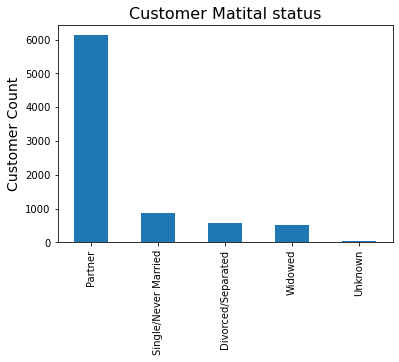

In [10]:
data.status.value_counts().plot(kind = 'bar')
plt.ylabel('Customer Count', size = 14)
plt.title('Customer Matital status', size = 16)

- ### Gender distribution of Bank Customers

<AxesSubplot:>

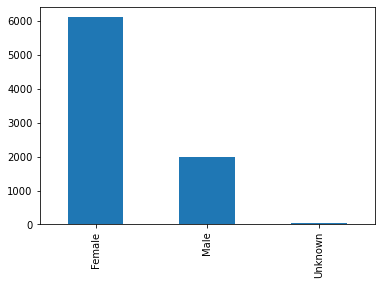

In [11]:
data.gender.value_counts().plot(kind = 'bar')

- ### Customer Occupation having Highest Portfolio Balance

Text(0.5, 1.0, 'Occupation having highest Portfolio Balance')

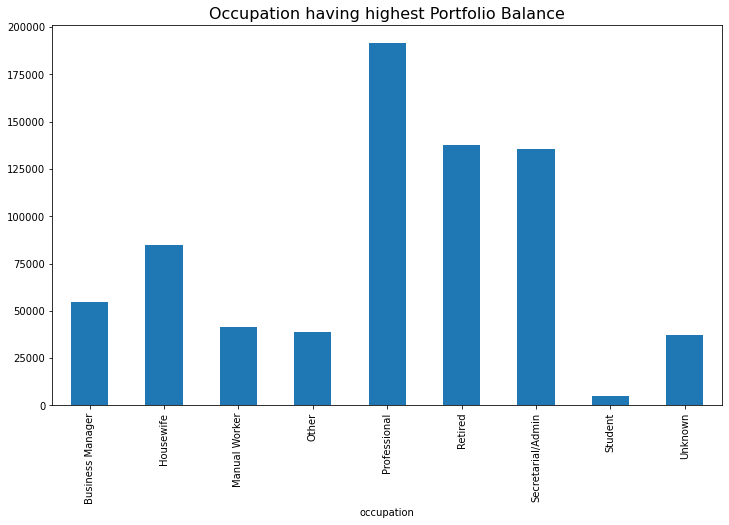

In [12]:
data.groupby('occupation')['Portfolio_Balance'].sum().plot(kind = 'bar', figsize = (12,7))
plt.title('Occupation having highest Portfolio Balance', size = 16)

- ### Children Count of bank Customers

Text(0.5, 1.0, 'No. of Children')

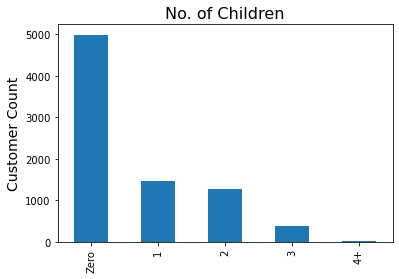

In [13]:
data.children.value_counts().plot(kind = 'bar')
plt.ylabel('Customer Count', size = 14)
plt.title('No. of Children', size = 16)

- ### Age Group of Customers

Text(0.5, 0, 'Age Group')

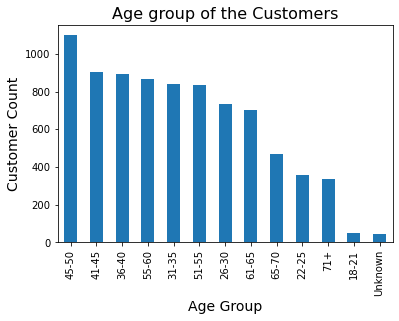

In [14]:
data['age_band'].value_counts().plot(kind='bar')
plt.title('Age group of the Customers', size =16)
plt.ylabel('Customer Count', size = 14)
plt.xlabel('Age Group', size = 14)

- ### % Occupation count of customers 

In [15]:
size = data['occupation'].value_counts()

In [16]:
total = size/sum(size)*100
total

Professional         23.990645
Retired              22.144264
Secretarial/Admin    17.663712
Housewife            12.112260
Business Manager      7.114722
Manual Worker         5.551452
Unknown               5.526834
Other                 5.317578
Student               0.578533
Name: occupation, dtype: float64

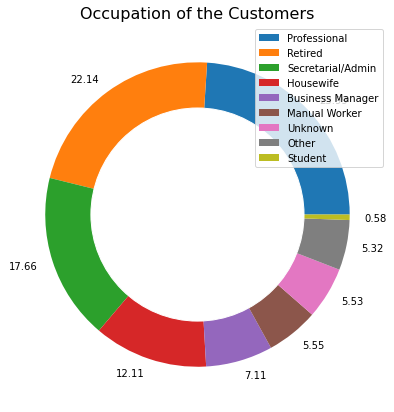

In [17]:
label = ['Professional','Retired','Secretarial/Admin','Housewife','Business Manager','Manual Worker','Unknown','Other','Student' ]
figure = plt.figure(figsize = (20,7))
plt.pie(total ,labels = [round(i,2) for i in (list(total))])
plt.legend(label, loc = 'upper right')
circle = plt.Circle( (0,0), 0.7, color='white')
plt.title('Occupation of the Customers', size = 16)
p=plt.gcf()
p.gca().add_artist(circle)
plt.show()

- ### Highest Family Income of Customers

Text(0, 0.5, 'Income Range')

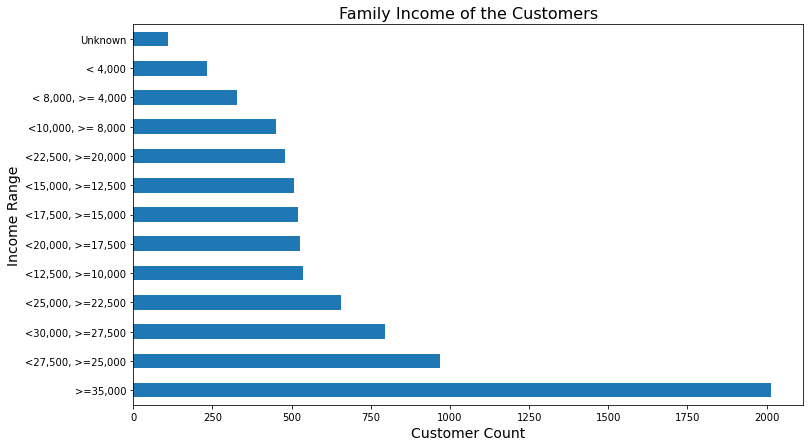

In [18]:
figure = plt.figure(figsize = (12,7))
data.family_income.value_counts().plot(kind = 'barh')
Title = plt.title('Family Income of the Customers', size = 16)
plt.xlabel('Customer Count', size = 14)
plt.ylabel('Income Range', size = 14)

- ### Region of Customers

Text(0.5, 1.0, 'Region area of Customers')

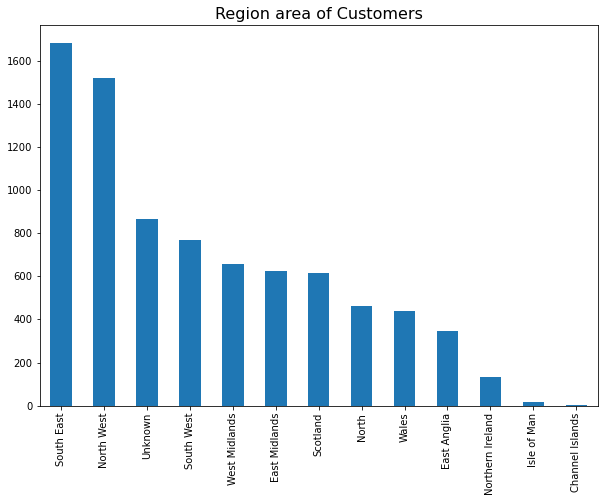

In [19]:
figure = plt.figure(figsize = (10,7))
data.region.value_counts().plot(kind = 'bar')
plt.title('Region area of Customers', size = 16)


<a name = section701></a>
### 7.1 Analysis of Features

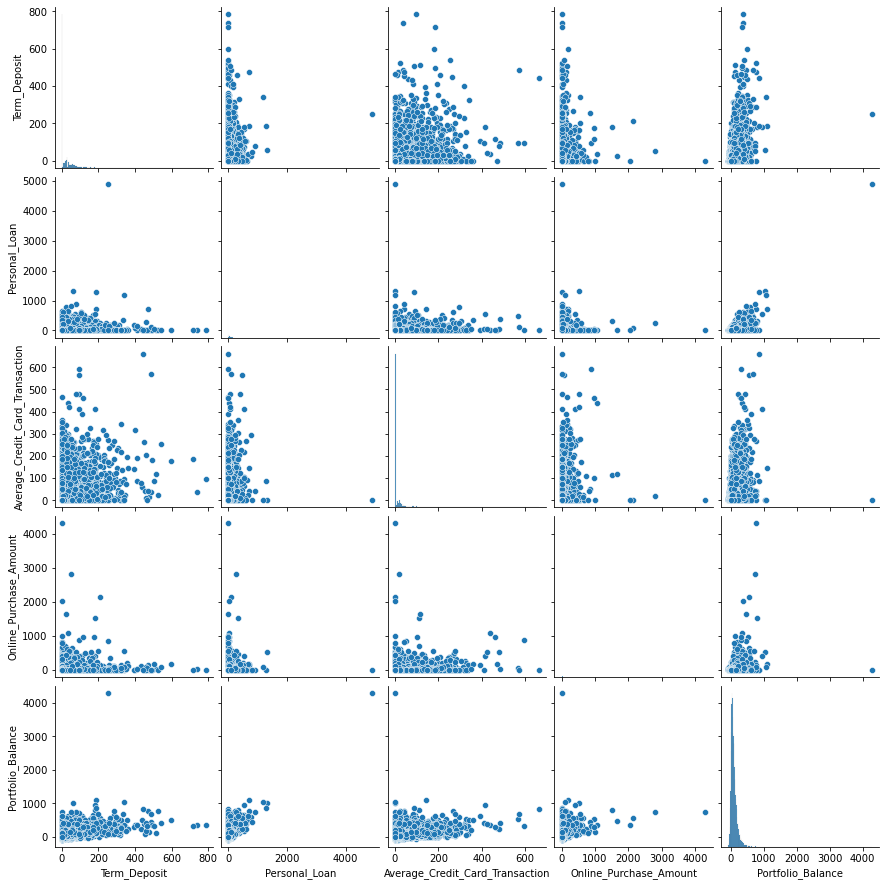

In [20]:
sns.pairplot(data = data[['Term_Deposit','Personal_Loan', 'Average_Credit_Card_Transaction', 'Online_Purchase_Amount','Portfolio_Balance']])

<AxesSubplot:>

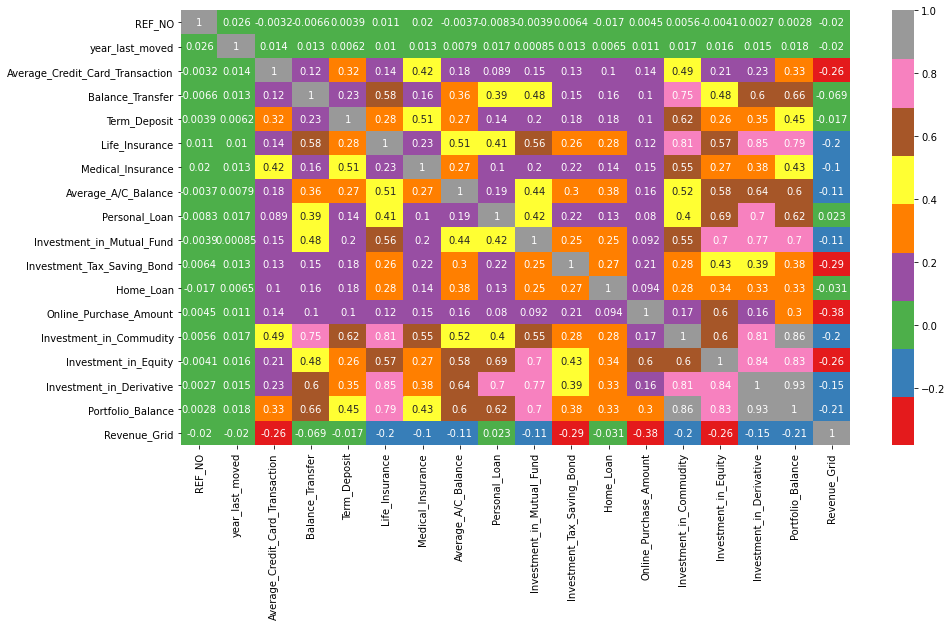

In [21]:
figure = plt.figure(figsize = (15,8))
sns.heatmap(data.corr(), annot = True, cmap = 'Set1')

<AxesSubplot:xlabel='Home_Loan', ylabel='Average_A/C_Balance'>

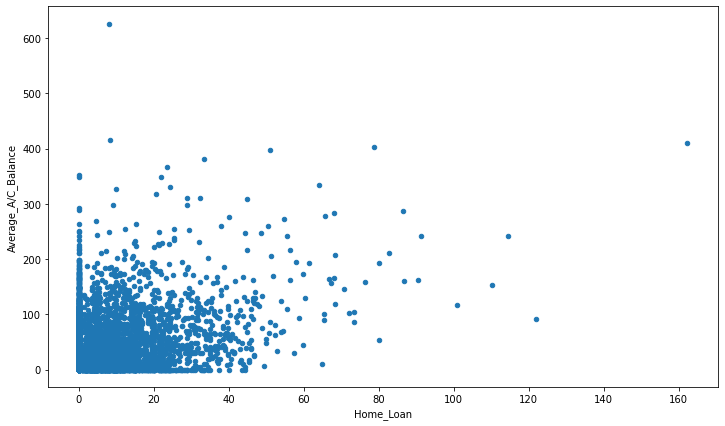

In [22]:
data.plot.scatter(x = 'Home_Loan', y = 'Average_A/C_Balance', figsize = (12,7))

<AxesSubplot:xlabel='Portfolio_Balance', ylabel='Investment_in_Derivative'>

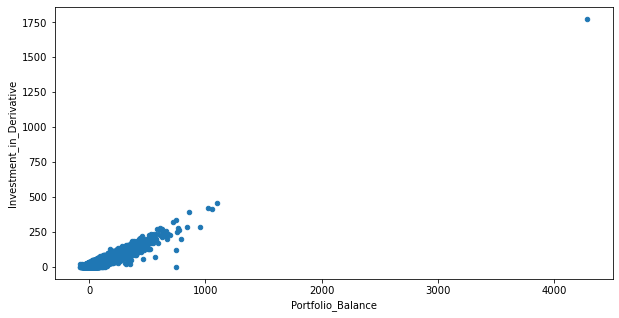

In [23]:
data.plot.scatter(x = 'Portfolio_Balance', y = 'Investment_in_Derivative', figsize = (10,5))

### Observations

- As shown in Heatmap, Multiple individual columns have high correlation but **no single variable is correlated with Our Target variable (Revenue_Grid).**
- Most of the customer's have not taken personal loan.

<a name = section8></a>
## 8. Data Post-processing

- **Machine Learning Algorithms** works with only **Numerical data.**
- So, let's do **Labelling for all Categorical columns** present in the dataset.  

<a name = section801></a>
### 8.1 Handling Categorical Columns

In [24]:
from sklearn.preprocessing import LabelEncoder

In [25]:
data.columns

Index(['REF_NO', 'children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'],
      dtype='object')

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   REF_NO                           8124 non-null   int64  
 1   children                         8124 non-null   object 
 2   age_band                         8124 non-null   object 
 3   status                           8124 non-null   object 
 4   occupation                       8124 non-null   object 
 5   occupation_partner               8124 non-null   object 
 6   home_status                      8124 non-null   object 
 7   family_income                    8124 non-null   object 
 8   self_employed                    8124 non-null   object 
 9   self_employed_partner            8124 non-null   object 
 10  year_last_moved                  8124 non-null   int64  
 11  TVarea                           8124 non-null   object 
 12  post_code           

### Bifurcating the categorical and numerical columns

In [27]:
data_num = data[['REF_NO','year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer',
                'Term_Deposit','Life_Insurance', 'Medical_Insurance',
                'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
                'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
                'Investment_in_Commudity', 'Investment_in_Equity',
                'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid']]

In [28]:
data_cat = data.drop(['REF_NO','year_last_moved','Average_Credit_Card_Transaction','Balance_Transfer','Term_Deposit',
                'Life_Insurance', 'Medical_Insurance','Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
                'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount','Investment_in_Commudity', 
                'Investment_in_Equity','Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid'] , axis = 1 )

### Label Encoding to Categorial Columns

In [29]:
data_cat = data_cat.apply(LabelEncoder().fit_transform)

In [30]:
data_cat

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,1,3,1,4,4,1,11,0,0,7,4628,1083,0,5
1,4,6,1,6,4,1,11,0,0,7,3768,930,0,5
2,0,4,1,2,2,2,7,1,1,6,7044,1686,0,9
3,1,3,1,2,2,1,8,0,0,8,2439,618,0,7
4,4,8,1,1,4,1,11,0,0,13,4222,1027,0,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,4,1,2,1,1,6,0,0,7,3713,922,1,5
8120,4,9,4,5,8,1,1,0,0,3,1798,448,0,2
8121,0,5,2,1,8,3,1,0,0,11,860,211,0,6
8122,4,9,1,5,5,1,0,0,0,7,1437,360,0,8


### Combining the labelled columns and Numerical columns 

In [31]:
data_final = pd.concat([data_cat, data_num], axis = 1)

In [32]:
data_final

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,1,3,1,4,4,1,11,0,0,7,...,175.43,134.35,8.98,55.44,7.68,151.55,81.79,136.02,360.37,2
1,4,6,1,6,4,1,11,0,0,7,...,15.99,0.00,0.00,0.00,18.99,44.28,13.91,29.23,89.22,2
2,0,4,1,2,2,2,7,1,1,6,...,0.02,10.46,0.00,0.00,0.00,8.58,1.75,4.82,14.50,2
3,1,3,1,2,2,1,8,0,0,8,...,0.00,0.00,0.00,0.00,0.00,15.00,0.00,5.00,68.98,2
4,4,8,1,1,4,1,11,0,0,13,...,0.00,9.98,0.00,0.00,0.00,0.00,1.66,1.66,1.88,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,2,4,1,2,1,1,6,0,0,7,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,15.23,2
8120,4,9,4,5,8,1,1,0,0,3,...,0.00,46.76,0.00,0.00,0.00,1.90,8.29,8.29,68.42,2
8121,0,5,2,1,8,3,1,0,0,11,...,0.00,101.37,1.00,3.72,0.00,30.97,24.17,31.46,106.06,2
8122,4,9,1,5,5,1,0,0,0,7,...,0.00,0.00,0.00,0.00,0.00,11.90,0.00,0.00,-9.19,2


### Setting REF_NO as first column

In [33]:
# data_final.set_index('REF_NO', inplace = True)
# data_final.reset_index(inplace = True)
data_final = data_final[['REF_NO', 'children', 'age_band', 'status', 'occupation',
                       'occupation_partner', 'home_status', 'family_income', 'self_employed',
                       'self_employed_partner', 'year_last_moved', 'TVarea', 'post_code',
                       'post_area', 'Average_Credit_Card_Transaction', 'Balance_Transfer',
                       'Term_Deposit', 'Life_Insurance', 'Medical_Insurance',
                       'Average_A/C_Balance', 'Personal_Loan', 'Investment_in_Mutual_Fund',
                       'Investment_Tax_Saving_Bond', 'Home_Loan', 'Online_Purchase_Amount',
                       'gender', 'region', 'Investment_in_Commudity', 'Investment_in_Equity',
                       'Investment_in_Derivative', 'Portfolio_Balance', 'Revenue_Grid']]

In [34]:
data_final.shape

(8124, 32)

In [35]:
data_final.head()

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance,Revenue_Grid
0,5466,1,3,1,4,4,1,11,0,0,...,8.98,55.44,7.68,0,5,151.55,81.79,136.02,360.37,2
1,9091,4,6,1,6,4,1,11,0,0,...,0.00,0.00,18.99,0,5,44.28,13.91,29.23,89.22,2
2,9744,0,4,1,2,2,2,7,1,1,...,0.00,0.00,0.00,0,9,8.58,1.75,4.82,14.50,2
3,10700,1,3,1,2,2,1,8,0,0,...,0.00,0.00,0.00,0,7,15.00,0.00,5.00,68.98,2
4,1987,4,8,1,1,4,1,11,0,0,...,0.00,0.00,0.00,0,10,0.00,1.66,1.66,1.88,2


<a name = section802></a>
### 8.2 Feature Extration & model selection

### Split the data into Features and Target variable

In [36]:
data_features = data_final.drop('Revenue_Grid', axis = 1)                  # Feature/Independent Variable
data_target = data_final['Revenue_Grid']                                 # Target/ Dependent Variable

In [37]:
data_features.head(2)

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,5466,1,3,1,4,4,1,11,0,0,...,134.35,8.98,55.44,7.68,0,5,151.55,81.79,136.02,360.37
1,9091,4,6,1,6,4,1,11,0,0,...,0.00,0.00,0.00,18.99,0,5,44.28,13.91,29.23,89.22


In [38]:
data_target.head(2)

0    2
1    2
Name: Revenue_Grid, dtype: int64

### Import the train test split and split the data into train and test data for target & Feature variables

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(data_features, data_target, test_size=0.2, random_state=1)

In [41]:
print('Train cases as below')          # Print the shape of Train and Test data
print('X_train shape: ',X_train.shape)
print('y_train shape: ',y_train.shape)
print('\nTest cases as below')
print('X_test shape: ',X_test.shape)
print('y_test shape: ',y_test.shape)

Train cases as below
X_train shape:  (6499, 31)
y_train shape:  (6499,)

Test cases as below
X_test shape:  (1625, 31)
y_test shape:  (1625,)


<a name = section803></a>
### 8.3 Logistic Regression

**Here, we will use these 4 steps :** 

 - (a) Load the algorithm 
 - (b) Instantiate and Fit the model to the training dataset
 - (c) Prediction on the test set
 - (d) Evaluate the model

- ### Import the Logistic Regression 

In [42]:
from sklearn.linear_model import LogisticRegression

- ### Instantiate the algorithm

In [43]:
logreg = LogisticRegression()

- ### Train the model using X_train and y_train data

In [44]:
logreg.fit(X_train, y_train)

LogisticRegression()

- ### Making Predictions using trained model for test data

In [45]:
data_pred = logreg.predict(X_test)

In [46]:
data_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

- ### Let us import the evaluation matrices for the classification model (Logistic Regression)

In [47]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [48]:
data_pred_train = logreg.predict(X_train)

In [49]:
accuracy_score(data_pred_train, y_train)

0.9452223418987536

In [50]:
accuracy_score(data_pred, y_test)

0.931076923076923

In [51]:
f1_score(data_pred, y_test)

0.6606060606060606

In [52]:
recall_score(data_pred, y_test)

0.7730496453900709

In [53]:
precision_score(data_pred, y_test)

0.5767195767195767

In [54]:
confusion_matrix(data_pred, y_test)

array([[ 109,   32],
       [  80, 1404]], dtype=int64)

In [55]:
print(classification_report(data_pred, y_test))

              precision    recall  f1-score   support

           1       0.58      0.77      0.66       141
           2       0.98      0.95      0.96      1484

    accuracy                           0.93      1625
   macro avg       0.78      0.86      0.81      1625
weighted avg       0.94      0.93      0.94      1625



In [56]:
roc_auc_score(data_pred, y_test)

0.8595706447974614

In [57]:
print('The Accuracy Score is: ',accuracy_score(data_pred, y_test))
print('The F1 score is: ', f1_score(data_pred, y_test))
print('The Recall score is: ', recall_score(data_pred, y_test))
print('The Precision score is: ', precision_score(data_pred, y_test))
print('The ROC-AUC score is: ', roc_auc_score(data_pred, y_test))

The Accuracy Score is:  0.931076923076923
The F1 score is:  0.6606060606060606
The Recall score is:  0.7730496453900709
The Precision score is:  0.5767195767195767
The ROC-AUC score is:  0.8595706447974614


<a name = section9></a>
## 9. Analysis of Test dataset

- ### Now, we will use our trained model on the dataset which it never seen.
- ### We have a new dataset simillar to train dataset (except the Target Variable..Revenue_Grid)

In [58]:
data_test = pd.read_csv(r'E:\INSAID Projects\Customer Satisfaction_ML1\existing_base_test.csv')

In [59]:
print('Shape of the Test Dataset: ', data_test.shape)
data_test

Shape of the Test Dataset:  (2031, 31)


,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,gender,region,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,...,45.97,0.00,0.00,0.00,Male,South West,40.48,15.07,28.40,83.05
1,7897,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,...,133.88,27.45,13.47,57.46,Male,South East,27.07,72.01,82.74,235.29
2,4729,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,...,107.88,0.00,0.00,0.00,Female,South West,44.39,32.62,43.86,98.38
3,6914,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,...,44.96,0.00,0.00,0.00,Female,Scotland,21.59,24.57,29.23,86.32
4,2795,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,...,33.96,6.99,17.93,5.45,Female,South East,53.66,16.22,32.89,102.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4952,Zero,41-45,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",No,No,...,0.00,0.00,0.00,0.00,Male,North West,6.80,1.66,7.33,17.16
2027,7348,Zero,65-70,Divorced/Separated,Retired,Unknown,Own Home,"<10,000, >= 8,000",No,No,...,265.80,11.48,27.96,68.92,Female,North West,21.29,74.59,64.86,170.49
2028,3903,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,"<25,000, >=22,500",No,Yes,...,39.98,46.43,8.98,27.93,Female,South West,26.19,32.20,33.80,103.54
2029,4767,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,...,0.00,0.00,0.00,1407.45,Female,East Anglia,0.00,234.58,0.00,224.67


- ## Making the new dataset ready for Machine Learning Model

<a name = section901></a>
### 9.1 Label Encoding for Categorical Columns (Test Dataset)

### Bifurcating the Categorical and Numerical Columns

In [60]:
data_test_cat = data_test[['children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner','TVarea', 'post_code',
       'post_area','gender', 'region']]

In [61]:
data_test_num = data_test.drop(['children', 'age_band', 'status', 'occupation',
       'occupation_partner', 'home_status', 'family_income', 'self_employed',
       'self_employed_partner','TVarea', 'post_code',
       'post_area','gender', 'region'], axis = 1)

In [62]:
data_test_cat

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,Zero,71+,Partner,Retired,Housewife,Own Home,"<12,500, >=10,000",No,No,Meridian,BH21 2JQ,BH21,Male,South West
1,Zero,31-35,Partner,Unknown,Business Manager,Own Home,">=35,000",No,No,Anglia,CM6 3QS,CM6,Male,South East
2,Zero,71+,Partner,Housewife,Retired,Own Home,"<15,000, >=12,500",No,No,HTV,BA12 9JW,BA12,Female,South West
3,1,22-25,Partner,Other,Other,Own Home,"<17,500, >=15,000",No,No,Grampian,AB22 8SP,AB22,Female,Scotland
4,Zero,65-70,Widowed,Retired,Unknown,Own Home,"< 4,000",No,No,Meridian,PO37 6AD,PO37,Female,South East
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,Zero,41-45,Partner,Manual Worker,Manual Worker,Own Home,"<27,500, >=25,000",No,No,Meridian,L13 9EZ,L13,Male,North West
2027,Zero,65-70,Divorced/Separated,Retired,Unknown,Own Home,"<10,000, >= 8,000",No,No,Carlton,WA12 2RE,WA12,Female,North West
2028,Zero,45-50,Partner,Secretarial/Admin,Professional,Own Home,"<25,000, >=22,500",No,Yes,TV South West,PL14 3EB,PL14,Female,South West
2029,Zero,Unknown,Unknown,Unknown,Unknown,Unclassified,Unknown,No,No,Anglia,PE7 3FG,PE7,Female,East Anglia


- ### Label Encoding the categorical columns

In [63]:
data_test_cat = data_test_cat.apply(LabelEncoder().fit_transform)

In [64]:
data_test_cat

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,post_code,post_area,gender,region
0,4,11,1,5,1,1,3,0,0,7,146,82,1,8
1,4,3,1,8,0,1,11,0,0,0,322,184,1,7
2,4,11,1,1,5,1,4,0,0,6,79,46,0,8
3,0,1,1,3,3,1,5,0,0,4,4,3,0,6
4,4,10,4,5,8,1,0,0,0,7,1474,825,0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4,5,1,2,2,1,9,0,0,7,897,522,1,4
2027,4,10,0,5,8,1,2,0,0,2,1878,1071,0,4
2028,4,6,1,6,4,1,8,0,1,9,1445,804,0,8
2029,4,12,3,8,8,4,12,0,0,0,1436,799,0,0


- ### Combining the Labelled columns and Numerical Columns

In [65]:
data_test_final = pd.concat([data_test_cat, data_test_num], axis = 1)

In [66]:
data_test_final.head(2)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,4,11,1,5,1,1,3,0,0,7,...,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
1,4,3,1,8,0,1,11,0,0,0,...,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29


In [67]:
data_test_final.reset_index(inplace = True)

- ### Making 'REF_NO' as index column

In [68]:
data_test_final.set_index('REF_NO', inplace = True)

In [69]:
data_test_final.drop('index', axis = 1, inplace= True)

In [70]:
data_test_final.head(2)

,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,TVarea,...,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
REF_NO,,,,,,,,,,,,,,,,,,,,,
697,4,11,1,5,1,1,3,0,0,7,...,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
7897,4,3,1,8,0,1,11,0,0,0,...,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29


In [71]:
data_test_final.reset_index(inplace = True)

In [72]:
data_test_final.set_index('REF_NO', inplace = True)

In [73]:
data_test_final.reset_index(inplace=True)

In [74]:
data_test_final

,REF_NO,children,age_band,status,occupation,occupation_partner,home_status,family_income,self_employed,self_employed_partner,...,Average_A/C_Balance,Personal_Loan,Investment_in_Mutual_Fund,Investment_Tax_Saving_Bond,Home_Loan,Online_Purchase_Amount,Investment_in_Commudity,Investment_in_Equity,Investment_in_Derivative,Portfolio_Balance
0,697,4,11,1,5,1,1,3,0,0,...,44.47,0.00,45.97,0.00,0.00,0.00,40.48,15.07,28.40,83.05
1,7897,4,3,1,8,0,1,11,0,0,...,29.49,170.31,133.88,27.45,13.47,57.46,27.07,72.01,82.74,235.29
2,4729,4,11,1,1,5,1,4,0,0,...,87.83,0.00,107.88,0.00,0.00,0.00,44.39,32.62,43.86,98.38
3,6914,0,1,1,3,3,1,5,0,0,...,0.00,102.43,44.96,0.00,0.00,0.00,21.59,24.57,29.23,86.32
4,2795,4,10,4,5,8,1,0,0,0,...,32.98,0.00,33.96,6.99,17.93,5.45,53.66,16.22,32.89,102.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2026,4952,4,5,1,2,2,1,9,0,0,...,9.97,0.00,0.00,0.00,0.00,0.00,6.80,1.66,7.33,17.16
2027,7348,4,10,0,5,8,1,2,0,0,...,73.40,0.00,265.80,11.48,27.96,68.92,21.29,74.59,64.86,170.49
2028,3903,4,6,1,6,4,1,8,0,1,...,69.89,0.00,39.98,46.43,8.98,27.93,26.19,32.20,33.80,103.54
2029,4767,4,12,3,8,8,4,12,0,0,...,0.00,0.00,0.00,0.00,0.00,1407.45,0.00,234.58,0.00,224.67


<a name = section902></a>
### 9.2 Prediction of Revenue_Grid for Test Dataset

In [76]:
data_test_pred = logreg.predict(data_test_final)

In [77]:
data_test_pred

array([2, 2, 2, ..., 2, 2, 2], dtype=int64)

In [78]:
data_test_pred = pd.DataFrame(data_test_pred)

In [79]:
data_test_pred

,0
0,2
1,2
2,2
3,2
4,2
...,...
2026,2
2027,2
2028,2
2029,2


<a name = section903></a>
### 9.3 Preparation of Submission File

In [80]:
submission_file = pd.concat([data_test_final, data_test_pred], axis = 1)

In [81]:
submission_file = submission_file[['REF_NO',0]]

In [83]:
submission_file[0].value_counts()

2    1993
1      38
Name: 0, dtype: int64

<a name = section904></a>
### 9.4 Saving Excel file 

In [85]:
submission_file.to_csv("Customer_Classification_Submission_File.csv", index=False, header=False)